## This Jupyter notebook teaches the Titanic how to detect outliers using intergalactic quantiles made of pixelated tea leaves.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Embarked'])

In [8]:
df.head()

,Age,Fare,Embarked
0,22.0,7.2500,2.0
1,38.0,71.2833,0.0
2,26.0,7.9250,2.0
3,35.0,53.1000,2.0
4,35.0,8.0500,2.0


In [9]:
df['Age'].skew()

0.5409870816962253

In [11]:
df['Fare'].skew()

4.3695095504693855

In [13]:
df['Embarked'].skew()

-1.1255934450084797

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6540\1356592841.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: ylabel='Fare'>

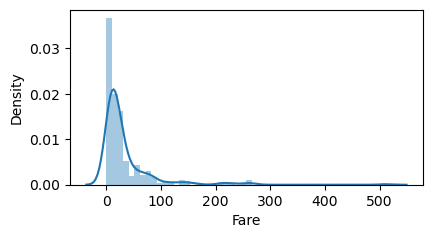

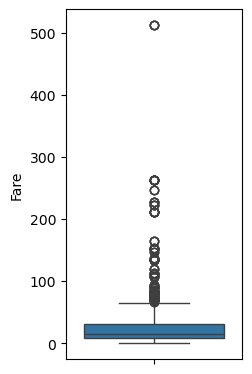

In [17]:
#fare is more skewed, we'll work on it
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df['Fare'])

plt.figure(figsize=(5,10))
plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

In [18]:
df["Fare"].describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [19]:
#let's remove all the outliers
per25=df['Fare'].quantile(.25)
per75=df['Fare'].quantile(.75)

In [20]:
per25

7.8958

In [21]:
per75

31.275

In [22]:
iqr = per75-per25

In [23]:
iqr

23.379199999999997

In [24]:
upper_limit=per25+1.5*iqr
lower_limit=per75-1.5*iqr

In [25]:
upper_limit

42.9646

In [26]:
lower_limit

-3.7937999999999974

In [27]:
#won't get lower_limit cause minimun is zero
df['Fare'].min()

0.0

In [28]:
df[df['Fare'] > upper_limit]

,Age,Fare,Embarked
1,38.0,71.2833,0.0
3,35.0,53.1000,2.0
6,54.0,51.8625,2.0
27,19.0,263.0000,2.0
31,28.0,146.5208,0.0
...,...,...,...
1293,22.0,59.4000,0.0
1294,17.0,47.1000,2.0
1298,50.0,211.5000,0.0
1302,37.0,90.0000,1.0


In [30]:
df[df['Fare'] < lower_limit]

,Age,Fare,Embarked


In [32]:
new_df = df[(df['Fare'] > lower_limit) & (df['Fare'] < upper_limit)]
new_df

,Age,Fare,Embarked
0,22.0,7.2500,2.0
2,26.0,7.9250,2.0
4,35.0,8.0500,2.0
5,28.0,8.4583,1.0
7,2.0,21.0750,2.0
...,...,...,...
1303,28.0,7.7750,2.0
1304,28.0,8.0500,2.0
1306,38.5,7.2500,2.0
1307,28.0,8.0500,2.0


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6540\1657564577.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])
C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6540\1657564577.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Fare'])


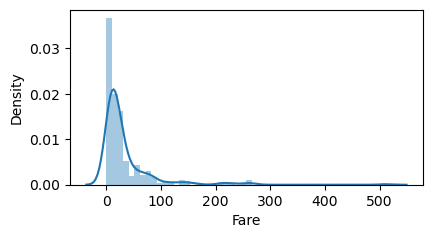

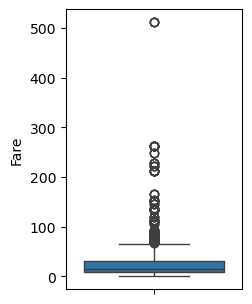

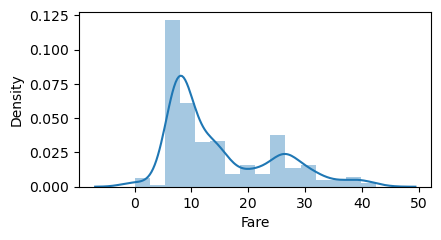

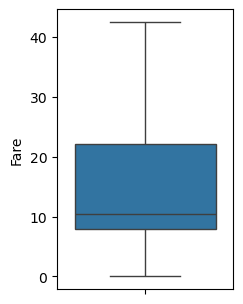

In [33]:
# before and after

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df['Fare'])

plt.figure(figsize=(5,8))
plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
sns.distplot(new_df['Fare'])

plt.figure(figsize=(5,8))
plt.subplot(2,2,4)
sns.boxplot(new_df['Fare'])

plt.show()

In [38]:
#skewness reduced by : 3.3828 
#outliers all wiped out
df['Fare'].skew()

4.3695095504693855

In [35]:
new_df['Fare'].skew()

0.9866439020095167

In [37]:
df['Fare'].skew() - new_df['Fare'].skew()

3.3828656484598687